In [246]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
# from scipy.integrate import odeint

In [247]:
N_h = 10000
N_v = 30000
E_h0=[0,0,0,0]
I_h0 = [1, 1, 1, 1] #initial infected humans with each variant
R_h0 = [0,0,0,0] #recovered from variant i
Sr_h0=[0, 0, 0, 0] #initial susceptible but recovered from variant i
V1_h0=[0,0,0,0] #recieved first vaccine from variant i
V_h0 = [0, 0, 0, 0]#recieved second vaccine after having variant i
S_h0 = N_h - np.sum(E_h0) - np.sum(I_h0) - np.sum(R_h0) - np.sum(Sr_h0) - np.sum(V1_h0) - np.sum(V_h0)
I_v0 = [1, 1, 0, 5] #initial infected vector with each variant
n= 4 #number of considered variants
S_v0 = N_v - np.sum(I_v0)

In [248]:
beta_h = 0.12  
beta_v = 0.12  
sigma = 1/9  
gamma = 1/9  
nu = 1/90 
N = 1500
v1 = N_h / N  
v2 = N_h / N 
psi = 1/90 

In [249]:
 #f_beta_h = np.tile(beta_h/2.5, (4, 4)) 
 #g_beta_h = np.tile(beta_h/3.5, (4, 4))
f_beta_h = g_beta_h = 0
# np.sum(np.tile(beta_h/3.5, (4, 4)) * I_v0 * Sr_h0)

In [250]:
t_span = (0.0, 365.0)
t = np.arange(0.0, 365.0, 0.1)
y0 = [S_h0]+ E_h0+I_h0+R_h0 +Sr_h0 +V1_h0+ V_h0+I_v0+[S_v0] #If we want variants, we need I_h0 to be a vector of length 4



In [251]:
   Ih=np.array(y0[(1+n):(1+2*n)] )
   S_h=np.array(y0[1:(1+n)] )
print(list(Ih)+list(S_h) )

[1, 1, 1, 1, 0, 0, 0, 0]


In [252]:
def deriv(t, y, n, N_h, N_v, beta_h, beta_v, sigma, gamma, nu, v1, v2, psi, f_beta_h, g_beta_h):
    #S_h, E_h, I_h, R_h, Sr_h, V1_h, V_h, S_v, I_v = y
    S_h=y[0] 
    E_h=np.array(y[1:(1+n)])
    I_h=np.array(y[(1+n):(1+2*n)] )
    R_h= np.array(y[(1+2*n):((1+3*n))] )
    Sr_h= np.array(y[(1+3*n):((1+4*n))])
    V1_h= np.array(y[(1+4*n):((1+5*n))])
    V_h=np.array(y[(1+5*n):((1+6*n))])
    I_v=np.array(y[(1+6*n):((1+7*n))])
    S_v=y[(1+7*n)]
    dShdt = -beta_h * np.sum(I_v) * (S_h / N_h)
    dEhdt = beta_h * I_v * (S_h / N_h) - sigma * E_h + np.sum(f_beta_h * I_v * Sr_h) + np.sum(g_beta_h * I_v * V1_h)
    dIhdt = sigma * E_h - gamma * I_h
    dRhdt = gamma * I_h - nu * R_h
    dSrhdt = nu * R_h - v1 * Sr_h + psi * V_h - np.sum(f_beta_h * I_v * Sr_h)
    dV1hdt = v1 * Sr_h - v2 * V1_h - np.sum(g_beta_h * I_v * V1_h) 
    dVhdt = v2 * V1_h - psi * V_h
    dSvdt = - beta_v * np.sum(I_h) * (S_v/N_v) # - mu * sin(mt) * S_v + phi * cos(nt) * S_v ->change and define variables
    dIvdt = beta_v * I_h * (S_v/N_v) - (((1+ np.sin(t/30))/40) * I_v)
    #print(dSvdt)
    return [dShdt]+ list(dEhdt)+ list(dIhdt)+ list(dRhdt)+ list(dSrhdt)+ list(dV1hdt)+ list(dVhdt)+list(dIvdt)+[ dSvdt]
   # return 0




In [253]:
# ret = odeint(deriv, y0, t, args=([N_h, N_v, beta_h, beta_v, sigma, gamma, nu, v1, v2, psi])) #not working
ret = scipy.integrate.solve_ivp(deriv, t_span, y0, method = 'RK45',t_eval=t, dense_output=False, events=None, vectorized=False, args=[n, N_h, N_v, beta_h, beta_v, sigma, gamma, nu, v1, v2, psi, f_beta_h, g_beta_h])



In [263]:
    S_h=ret.y[0] 
    E_h=np.array(ret.y[1:(1+n)])
    I_h=np.array(ret.y[(1+n):(1+2*n)] )
    R_h= np.array(ret.y[(1+2*n):((1+3*n))] )
    Sr_h= np.array(ret.y[(1+3*n):((1+4*n))])
    V1_h= np.array(ret.y[(1+4*n):((1+5*n))])
    V_h=np.array(ret.y[(1+5*n):((1+6*n))])
    I_v=np.array(ret.y[(1+6*n):((1+7*n))])
    S_v=ret.y[(1+7*n)]
print(np.sum(R_h+I_h+E_h+Sr_h+V1_h+V_h, axis=0)+S_h    )

[10000. 10000. 10000. ... 10000. 10000. 10000.]


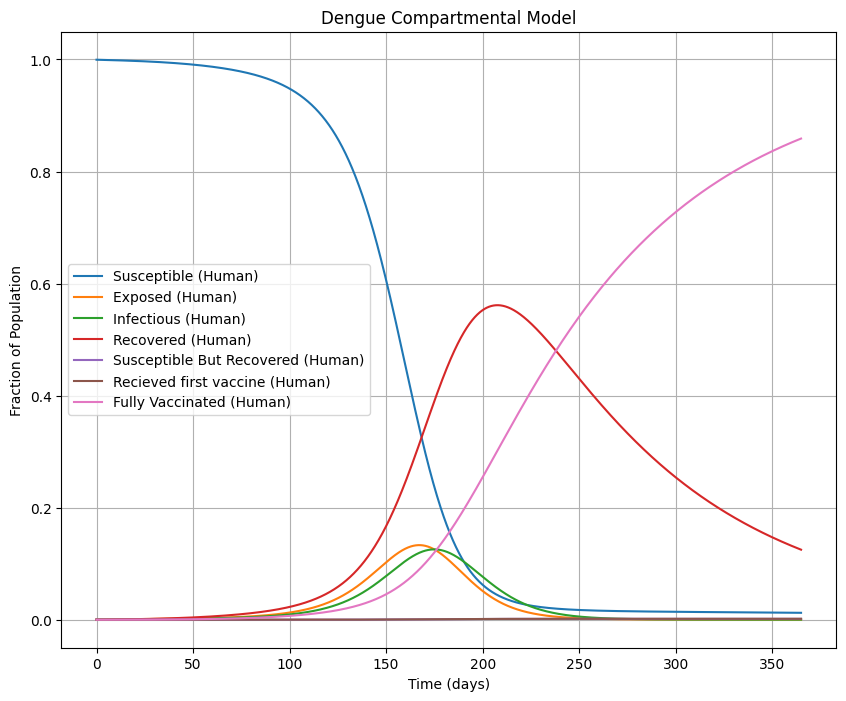

In [267]:
plt.figure(figsize=(10, 8))
plt.plot(ret.t, S_h/N_h, label='Susceptible (Human)')
plt.plot(ret.t, np.sum(E_h,axis=0)/N_h, label='Exposed (Human)')
plt.plot(ret.t, np.sum(I_h,axis=0)/N_h, label='Infectious (Human)')
plt.plot(ret.t, np.sum(R_h,axis=0)/N_h, label='Recovered (Human)')
plt.plot(ret.t, np.sum(Sr_h,axis=0)/N_h, label='Susceptible But Recovered (Human)')
plt.plot(ret.t, np.sum(V1_h,axis=0)/N_h, label='Recieved first vaccine (Human)')
plt.plot(ret.t, np.sum(V_h,axis=0)/N_h, label='Fully Vaccinated (Human)')
#plt.plot(ret.t, ret.y[5]/N_h, 'r', label='V1 (Human)')
# plt.plot(ret.t, ret.y[7]/N_v, 'g', label='Susceptible (Vector)')
# plt.plot(ret.t, ret.y[8]/N_v, 'm', label='Infectious (Vector)')
plt.xlabel('Time (days)')
plt.ylabel('Fraction of Population')
plt.title('Dengue Compartmental Model')
plt.legend()
plt.grid(True)
#plt.savefig('D_Susceptible/Infected.png', bbox_inches='tight')
plt.show()

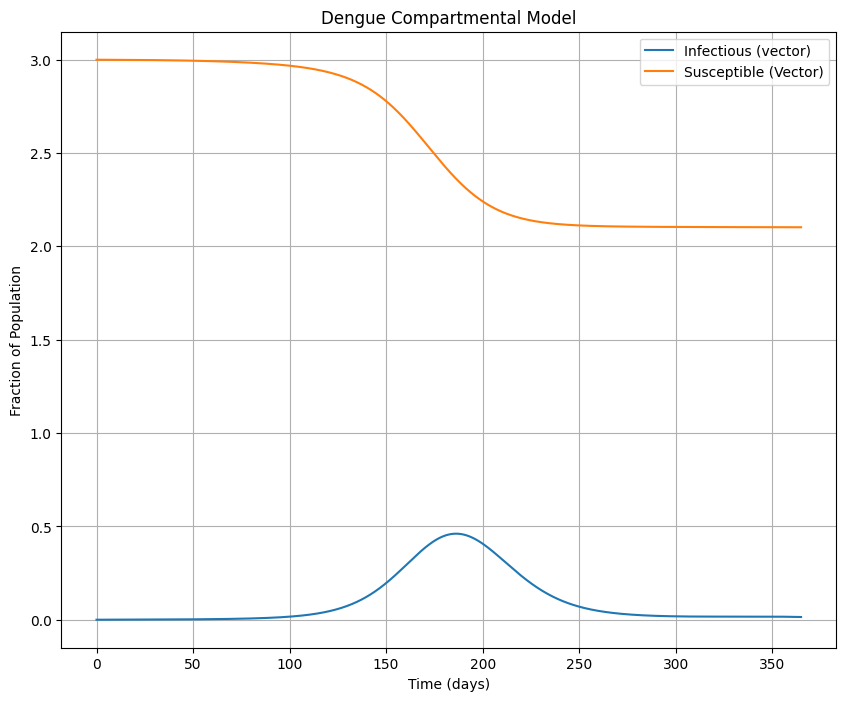

In [269]:
plt.figure(figsize=(10, 8))
#plt.plot(ret.t, ret.y[0]/N_h, 'b', label='Susceptible (Human)')
#plt.plot(ret.t, ret.y[2]/N_h, 'r', label='Infectious (Human)')
plt.plot(ret.t, np.sum(I_v,axis=0)/N_h, label='Infectious (vector)')
plt.plot(ret.t, S_v/N_h, label='Susceptible (Vector)')
plt.xlabel('Time (days)')
plt.ylabel('Fraction of Population')
plt.title('Dengue Compartmental Model')
plt.legend()
plt.grid(True)
#plt.savefig('D_Susceptible/Infected.png', bbox_inches='tight')
plt.show()

In [ ]:
dotx = 10
doty=7

x= [1,11,21]
y=[3,10,17]